<center>
<h1 style="background-color:lime; color:black; border-radius:10px; width:80%; padding:10px; font-family:Monaco">Classification and Neural Networks</h1>
</center>

<div style="color: green; font-family:Cascadia code pl; font-size:0.8rem">
<hr/>
<h2>Agenda<h2>
<ol>
<li> What is classification how classification works</li>
<li> What are the problems we can solve with classification</li>
<li> Further use of classification</li>
<li> Classification Algorithms (3/4 classes)</li>
<li> Neural Network</li>
<hr/>
Leter we will discuss...
<li> How Neural Network works</li>
<li> How to implement Neural Network in PyTorch</li>
</ol>
</div>

In [11]:
# Global Configurations
from IPython.display import display, HTML

def apply_style(style):
    display(HTML(style))

style = """
<style>
*{
    font-family: Monaco;
    font-size:1rem;
    
}

h3{
    background-color:rgba(79,240,197,0.4);
    font-family: cascadia code pl;
    font-size: 2rem;
    color: black;
    padding: 10px;
    width: fit-content;
    border-radius:5px;
}
</style>
"""

apply_style(style)


---
<h3>Classification</h3>

As the name suggests, classification in machine learning is classifying something into a certain category based on it's features. It'll be more clear with an example. 

Suppose we have a data for 10 patients (`name`, `age`, `blood glucose level`, `skin thickness`, `height`, `weight`) now we have to predict that __person has diabetes or not__. In simple work we have to make each patient fall into one of the bucket (has diabetes & does not have diabetes). 

For this we have to train the `model` (`model` --> machine learning algorithm) to learn from those available features and make a decision.

---

<h3>Usage of Classification</h3>
Classification is used in everywhere. It sounds simple and straight forward once you'll understand, but it is the heart of 

- image classification, 
- Text classification,
- Sentiment analysis, 
- Emotion detection 
and also the core of 
- <em>Neural Network</em>

<h3>How can we do this?</h3>

> 1. First just take a look into the data.

We have picked the most liked diabetes data from __KAGGLE__

---
<img src="./Images/diabetes_data_kaggle.png" />

---
I have downloaded the data ...

In [2]:
# Importing dependencies and configuring them.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,6)

In [3]:
data = pd.read_csv('./Data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are lot more data than we've thought

In [4]:
data.size

6912

---
<h3>How does this thing even happen?</h3>


> * to understand this let's take only two features (feature --> the data to predict the outcome)
>> 1. BMI
>> 2. Glucose
#### Plot the data and see how this thing look like
---

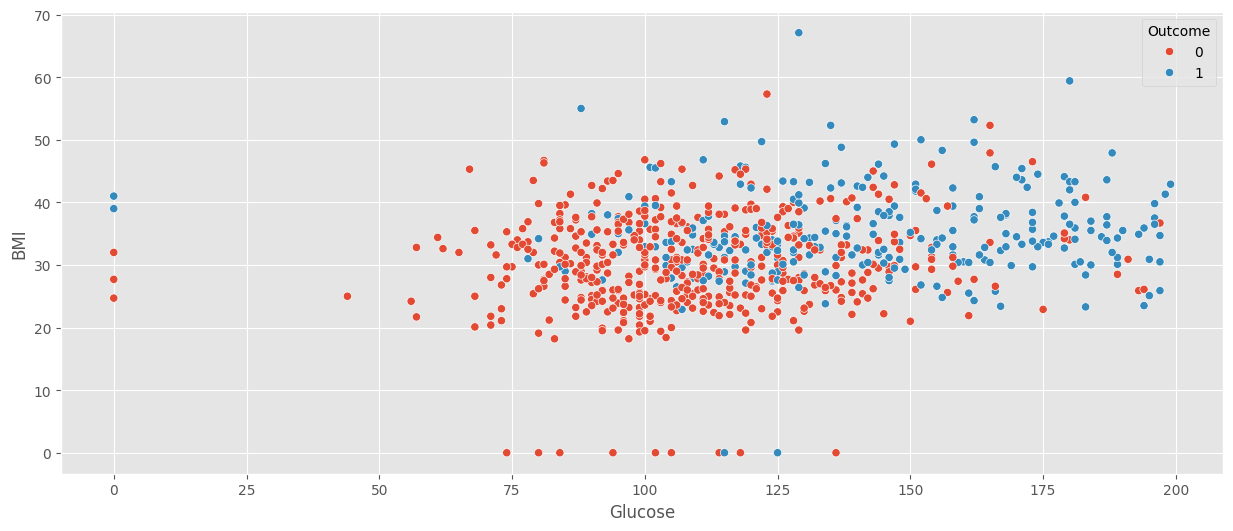

In [5]:
# Code for the plot...
sns.scatterplot(data=data, x='Glucose', y='BMI', hue='Outcome');

#### In the plot:
---

The <span style="color:blue;">Blue</span> color dots are diabetes patients and the <span style="color:red;">Red</span> color dots are the patients without diabetes.

However in 2 dimensional plain we can't see a clear border/plain between these classes (blue and red) to tell that "after this line/plain all patients are diabetic and before this line/plain all the patients are non diabetic." Now in higher dimensional plain (3d, 4d, 5d ...) we may find some plain to make a clear difference between these.

---
Let's visualize this data in 3d with a 3rd feature, 

lets take `bloodpressure`

In [8]:
# 3d plot
from ipywidgets import interact
import ipywidgets as widgets
@interact(x=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
          y=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
          z=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],)
def plot_3d(x='Glucose', y='BMI', z='BloodPressure'):
    fig = plt.figure(figsize=(10, 8))
    plt.style.use('default')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[x],
                data[y],
                data[z],
                c=data["Outcome"], cmap='vlag')
    fig.show()

interactive(children=(Dropdown(description='x', index=1, options=('Pregnancies', 'Glucose', 'BloodPressure', '…

---
<h3>Algorithms to make these things happen</h3>

1. Logistic Regression
2. Decision Trees
3. Random Forest
4. Support Vector Machines
5. Neural Networks

<h3> Logistic Regression</h3>

---

#### Materials:
1. [Basic- Intermediate] [Logistic Regression - Towards Data Science](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

2. [More Advanced] [Logistic Regression - Standford](https://web.stanford.edu/~jurafsky/slp3/5.pdf)

In [34]:
import numpy as np
@interact(w=(0, 2, 0.1), b=(0, 2, 0.1))
def plot_sigmoid(w, b):
    x = np.linspace(-10, 10, 1000)
    y = 1 / (1 + np.exp(-x*w - b))
    plt.axvline(0, 0, 1)
    plt.plot(x, y, 'r--')
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='w', max=2.0), FloatSlider(value=1.0, description='b'…

<h3>Visual Representation</h3>

> 1. Let's see how some logistic hyperplane/lines looks

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKXg8Bfod-oEoS3K-7RD1mCxCq8ab1vWMi8-j5CP6UVUkGlR6zkGhngZUuwFnc540lnHY&usqp=CAU" width=400px height=400px>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSh0w1ZIqyhko55Ru68TrSy3qGjEdSph2smQ8GbmgJFbzibAADO1BRY6kbFg4oIL4uOv48&usqp=CAU" width=400px height=400px/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdQx6gI_-eoTx-DdoQNd-XnEw4qIoO_JQZFHrtNj0LohRPOyTC0q5RCHimzKr9bg3jg40&usqp=CAU" width=400px height=400px/>